In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [2]:
# Import Data -  Australian Drug Sales
DrugSalesData = pd.read_csv('timeseries.csv',parse_dates=['ds'], index_col='ds')

In [3]:
DrugSalesData

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [4]:
DrugSalesData.reset_index(inplace=True)

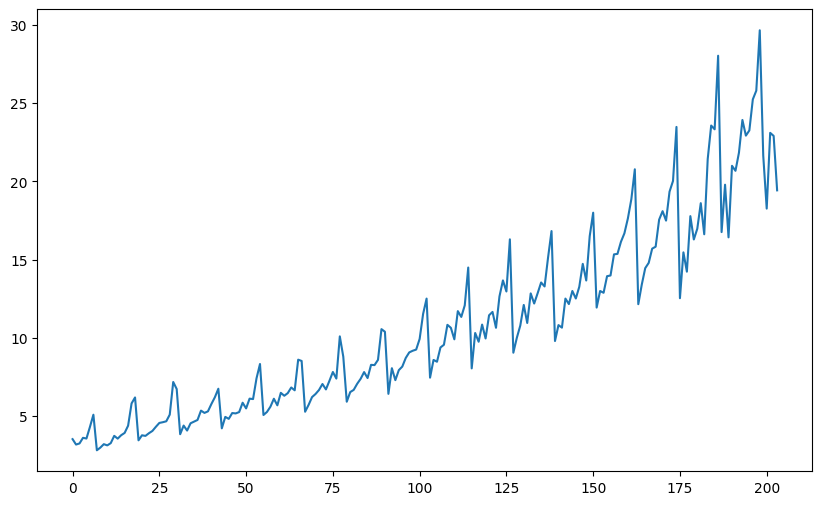

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['y'])

In [6]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(DrugSalesData['y'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['y'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

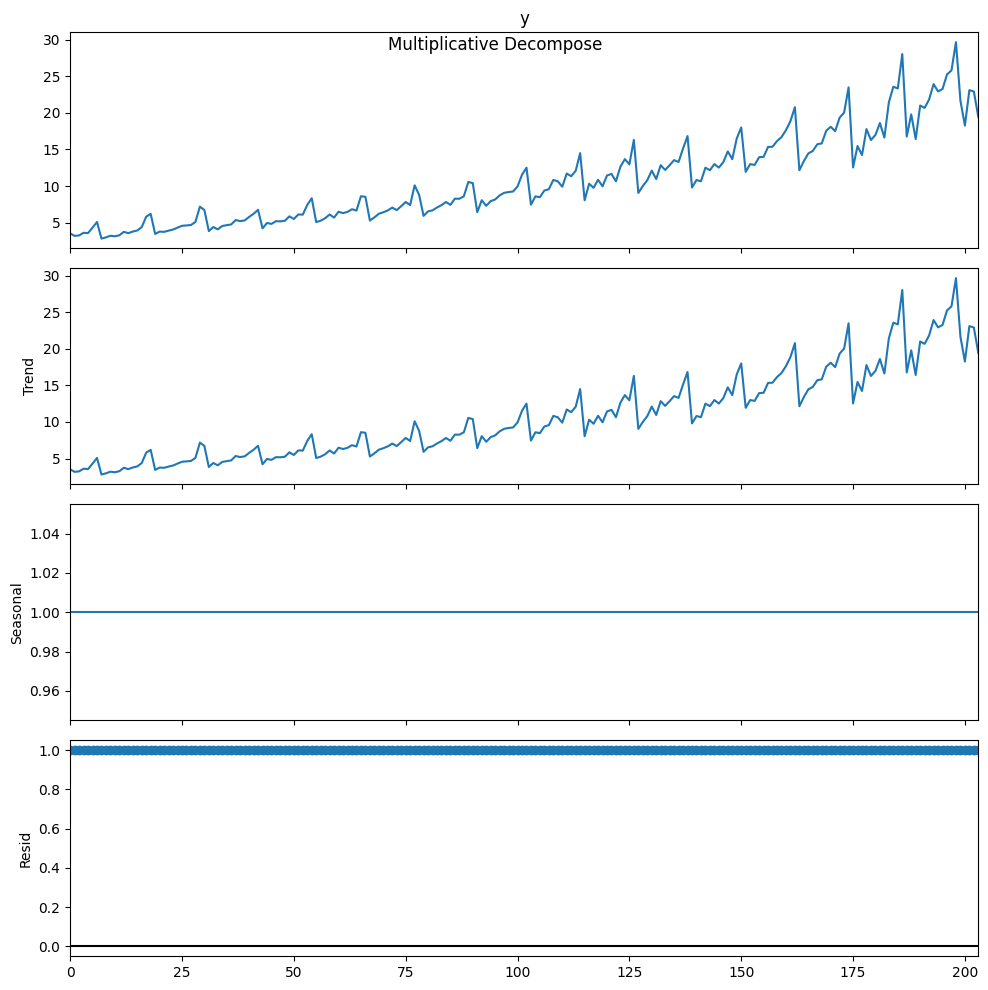

In [7]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

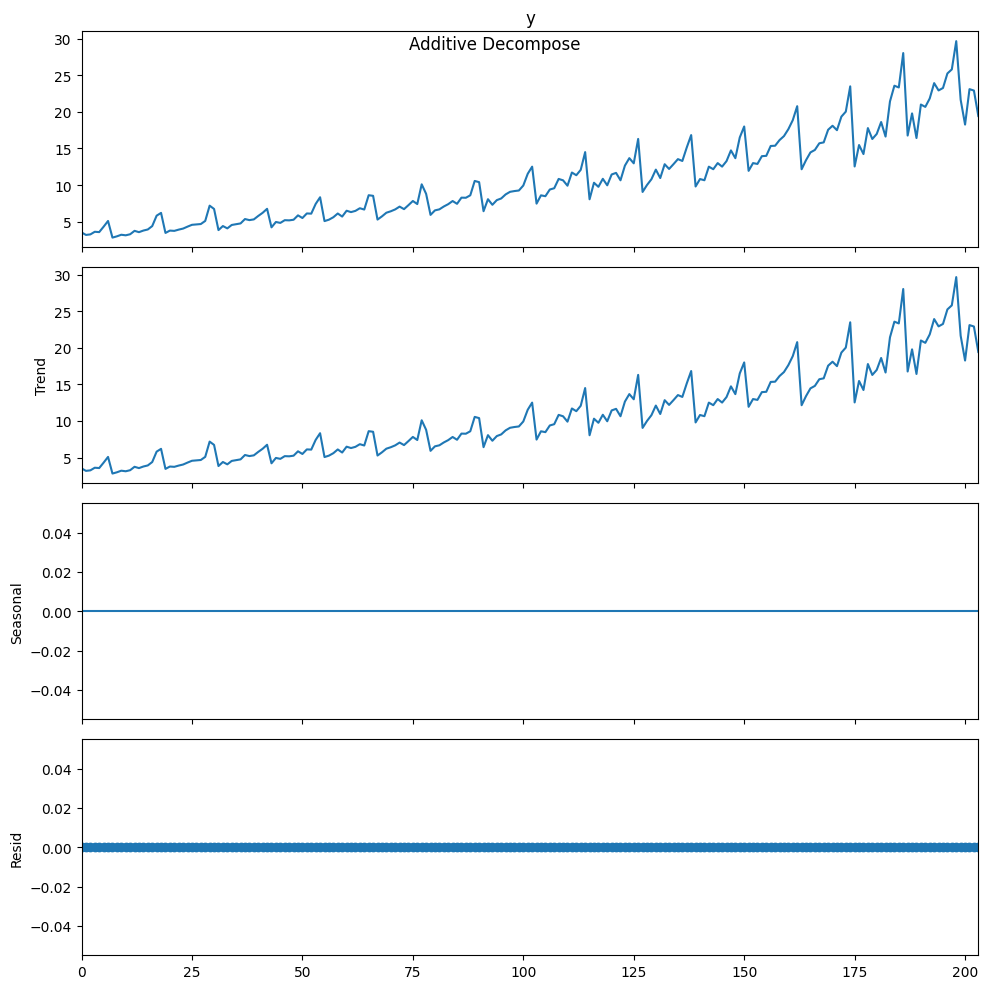

In [8]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [9]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [10]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869
